In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import joblib


In [3]:
#Obtain the trained model to do predictions
# Specify the file path where the model is saved
model_filename = 'trained_digit_detection_model.pkl'

# Load the model using joblib
loaded_model = joblib.load(model_filename)

# Access the model parameters like this:
W1 = loaded_model['W1']
b1 = loaded_model['b1']
W2 = loaded_model['W2']
b2 = loaded_model['b2']

# Use the loaded model for predictions or further analysis

In [4]:
data = pd.read_csv("digit-recognizer/train.csv") #Here we use the famous MNIST dataset
#You can download it from here: https://www.kaggle.com/c/digit-recognizer/data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data) # convert data into to numpy array
m, n = data.shape # m = 42000, n = 785 since there are 42000 examples and 784 pixels + 1 label
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # first 1000 examples for dev set (1000, 785) and transpose
Y_dev = data_dev[0] # first column is the labels which represent the label of the digit
X_dev = data_dev[1:n] # rest of the columns are the pixels
X_dev = X_dev / 255 # normalize the pixels we will divide by 255 since the max value of a pixel is 255

data_train = data[1000:m].T # rest of the examples for training set (41000, 785) and transpose
Y_train = data_train[0] # first column is the labels which represent the label of the digit
X_train = data_train[1:n] # rest of the columns are the pixels
X_train = X_train / 255. # normalize the pixels we will divide by 255 since the max value of a pixel is 255
_,m_train = X_train.shape # m_train = 41000 examples for training set

In [6]:
def ReLu(Z): #ReLu function which will be used as activation function
    return np.maximum(Z, 0) #Return the maximum value between Z and 0
    
def Softmax(Z): #Softmax function which will be used as activation function
    A =  np.exp(Z) / sum(np.exp(Z)) #Return the exponential of Z divided by the sum of exponential of Z
    return A

def forward_prop(W1, b1, W2, b2, X): #Forward propagation function
    Z1 = W1.dot(X) + b1 
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1, A1, Z2, A2

In [10]:
def get_predictions(A2): #Get predictions function which will return the predictions of the model
    return np.argmax(A2, 0)

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def get_accuracy(predictions, Y): #Get accuracy function which will return the accuracy of the model
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


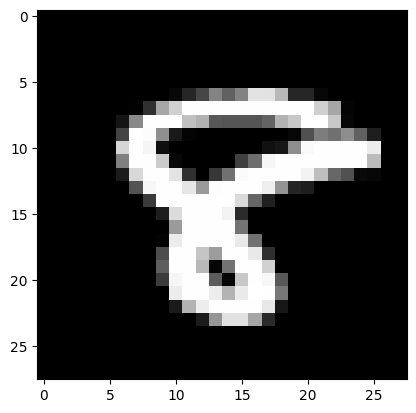

Prediction:  [0]
Label:  0


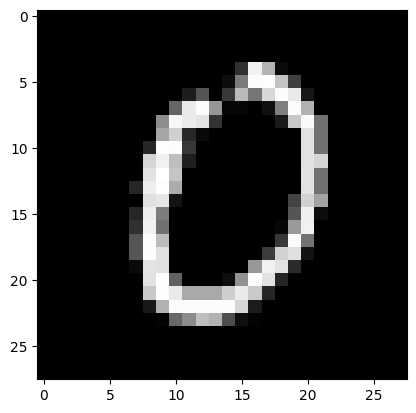

Prediction:  [3]
Label:  3


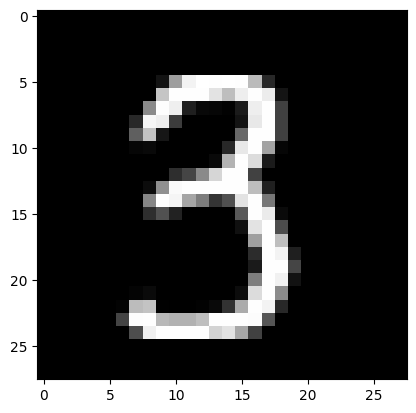

Prediction:  [9]
Label:  4


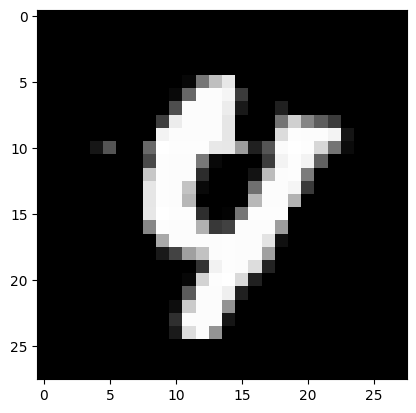

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 8 5 9 6 0 2 8 9 5 5 4 9 4 7 1 1 6 3 7 8 9 2 2 3 7 6 1 8 1 4 4 8 4 5 4 2
 7 6 2 3 0 1 6 0 3 6 2 5 9 9 8 4 1 3 3 0 5 0 2 1 3 8 5 6 0 9 0 6 9 8 8 8 1
 2 9 9 9 2 7 4 1 7 5 4 2 6 7 6 6 6 2 9 7 8 5 7 6 7 0 9 8 8 2 4 9 5 5 1 1 1
 4 2 8 6 0 9 3 4 9 2 1 1 4 8 8 5 0 2 2 8 2 4 4 8 8 1 0 2 6 2 0 2 1 8 6 1 5
 3 7 1 3 5 4 3 5 7 1 9 2 4 9 8 6 6 9 7 7 5 8 3 7 0 8 4 2 6 1 5 8 1 6 4 6 8
 8 1 0 3 5 4 9 8 4 5 4 3 7 6 8 8 7 9 8 3 3 2 9 8 3 3 4 3 8 9 3 7 1 8 9 2 5
 6 9 6 9 4 8 3 5 6 8 0 6 0 9 6 0 3 7 8 3 1 3 7 7 2 1 9 1 5 0 8 2 1 3 7 9 7
 8 2 9 8 4 7 8 6 8 8 4 1 1 9 9 1 3 6 1 2 3 0 8 0 3 9 1 9 3 0 1 8 9 3 3 4 3
 4 0 9 0 0 9 6 7 0 3 4 8 3 7 3 3 5 1 7 1 3 8 9 2 4 9 0 1 0 0 2 8 8 4 1 4 9
 8 8 1 3 9 8 6 5 2 9 3 1 1 0 8 6 6 3 9 2 7 8 1 0 3 8 6 5 1 7 8 4 1 8 5 7 2
 3 6 6 2 1 9 9 3 3 6 1 9 6 0 5 1 9 1 1 1 5 3 3 3 1 9 1 4 3 8 1 5 9 3 3 2 3
 1 1 8 0 6 8 0 9 5 9 9 8 2 0 6 5 8 7 0 2 9 9 4 1 2 6 0 6 8 5 3 9 2 1 1 0 4
 9 5 6 5 6 1 1 4 8 9 6 2 5 9 3 6 4 0 8 9 7 0 9 2 1 2 5 3 5 8 1 0 2 2 0 2 6
 7 8 7 3 8 1 5 7 8 1 6 3 

0.833